# Ciepło topnienia i parowania lodu

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Wprowadzenie danych

In [2]:
dane_lod_przed = np.array([
    [0, 23.1], [30, 23.1], [60, 23.1], [90, 23.1], [120, 23.1],
    [150, 23.1], [180, 23.1], [210, 23.1], [240, 23.1], [270, 23.1], [300, 23.1]
])
dane_lod_po = np.array([
    [300, 21.5], [330, 18.9], [360, 17.7], [390, 17.2], [420, 16.9],
    [450, 16.7], [480, 16.9], [510, 18.0], [540, 17.4], [570, 17.6], [600, 17.7]
])

# --- Dane z drugiej tabeli (Eksperyment z parą) ---
dane_para_przed = np.array([
    [0, 24.5], [30, 24.5], [60, 24.5], [90, 24.5], [120, 24.5],
    [150, 24.5], [180, 24.4], [210, 24.4], [240, 24.4], [270, 24.4], [300, 24.4]
])
dane_para_po = np.array([
    [300, 40.8], [330, 43.0], [360, 45.6], [390, 47.4], [420, 48.9],
    [450, 49.8], [480, 50.6], [540, 51.6], [600, 52.1], [660, 52.4],
    [720, 52.5], [750, 52.4]
])

# --- Rozdzielanie kolumn na oddzielne zmienne ---

# Notacja [:, 0] oznacza "weź wszystkie wiersze, ale tylko kolumnę o indeksie 0"
# Notacja [:, 1] oznacza "weź wszystkie wiersze, ale tylko kolumnę o indeksie 1"

# Eksperyment z lodem - Przed
czas_lod_przed = dane_lod_przed[:, 0]
temp_lod_przed = dane_lod_przed[:, 1]

# Eksperyment z lodem - Po
czas_lod_po = dane_lod_po[:, 0]
temp_lod_po = dane_lod_po[:, 1]

# Eksperyment z parą - Przed
czas_para_przed = dane_para_przed[:, 0]
temp_para_przed = dane_para_przed[:, 1]

# Eksperyment z parą - Po
czas_para_po = dane_para_po[:, 0]
temp_para_po = dane_para_po[:, 1]

## Część Pierwsza - Ciepło topnienia lodu

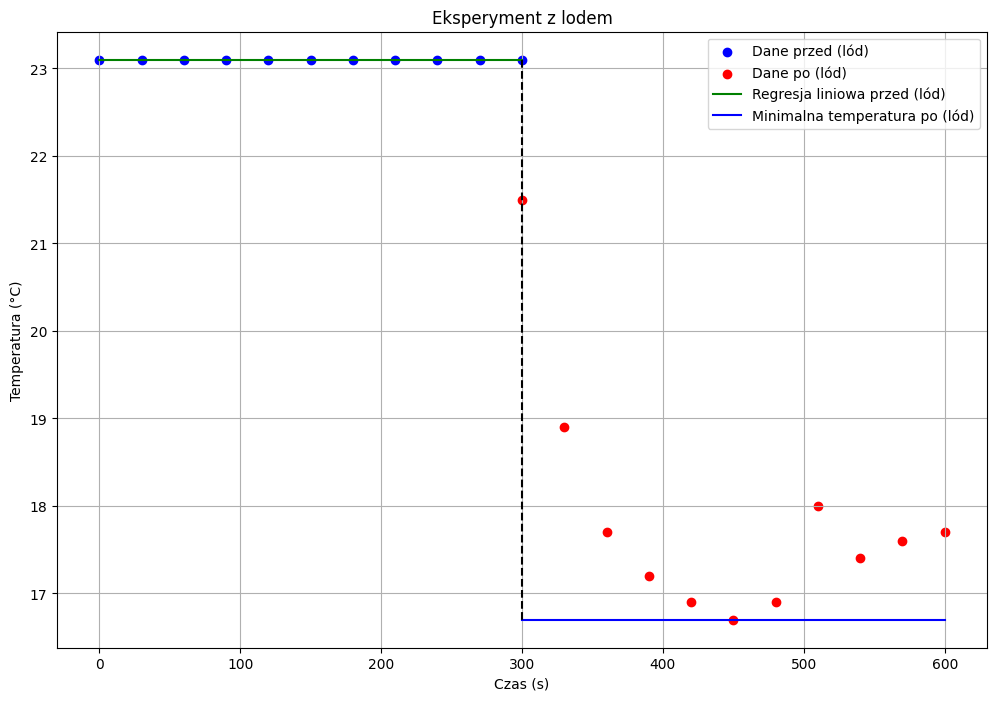

In [12]:
# Obliczenie prostej regresji dla danych przed i wyznaczenie prostej dla minimalnej temperatury

# Regresja liniowa dla danych przed
wspolczynniki_przed = np.polyfit(czas_lod_przed, temp_lod_przed, 1)
prosta_przed = np.poly1d(wspolczynniki_przed)

# Wyznaczenie minimalnej temperatury z danych po
min_temp_po = np.min(temp_lod_po)
# Znalezienie czasu, kiedy temperatura osiągnęła minimalną wartość
czas_min_temp_po = czas_lod_po[np.argmin(temp_lod_po)]


plt.figure(figsize=(12, 8))
plt.scatter(czas_lod_przed, temp_lod_przed, color='blue', label='Dane przed (lód)')
plt.scatter(czas_lod_po, temp_lod_po, color='red', label='Dane po (lód)')
plt.plot(czas_lod_przed, prosta_przed(czas_lod_przed), color='green', label='Regresja liniowa przed (lód)')
plt.plot([czas_min_temp_po - 150, czas_min_temp_po + 150], [min_temp_po, min_temp_po], 'b', label='Minimalna temperatura po (lód)')
plt.plot([300, 300], [23.1, min_temp_po], 'k--')
plt.xlabel('Czas (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Eksperyment z lodem')
plt.legend()
plt.grid()

## Część Druga - Ciepło parowania wody

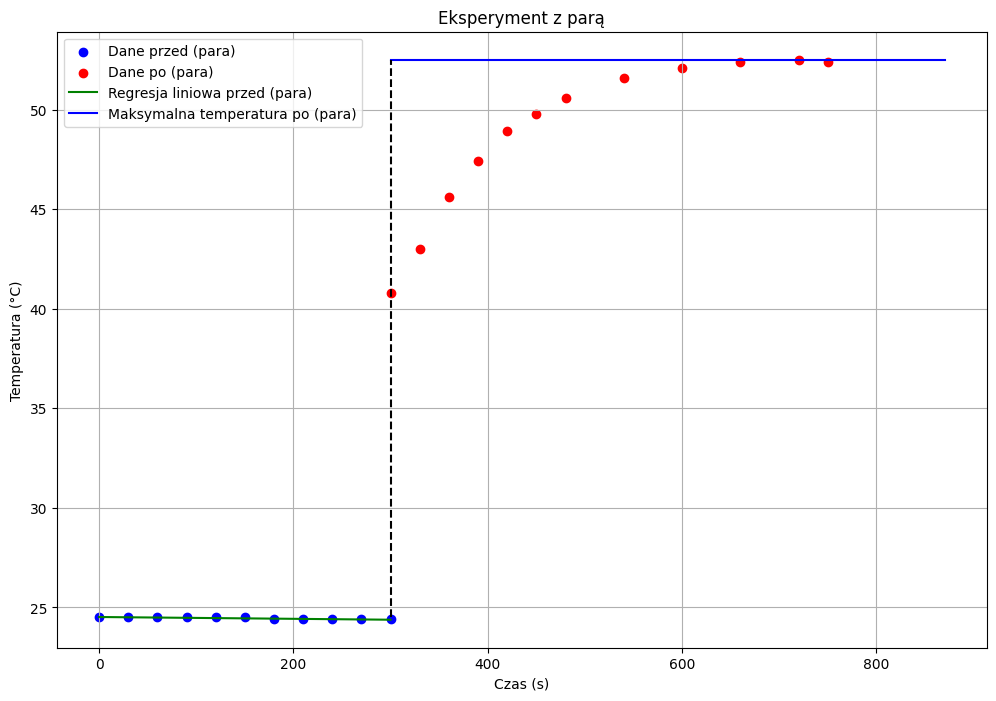

In [18]:
# Obliczenie prostej regresji dla danych przed i wyznaczenie prostej dla maksymalnej temperatury
# Regresja liniowa dla danych przed
wspolczynniki_przed_para = np.polyfit(czas_para_przed, temp_para_przed, 1)
prosta_przed_para = np.poly1d(wspolczynniki_przed_para)

# Wyznaczenie maksymalnej temperatury z danych po
max_temp_po = np.max(temp_para_po)
# Znalezienie czasu, kiedy temperatura osiągnęła maksymalną wartość
czas_max_temp_po = czas_para_po[np.argmax(temp_para_po)]

plt.figure(figsize=(12, 8))
plt.scatter(czas_para_przed, temp_para_przed, color='blue', label='Dane przed (para)')
plt.scatter(czas_para_po, temp_para_po, color='red', label='Dane po (para)')
plt.plot(czas_para_przed, prosta_przed_para(czas_para_przed), color='green', label='Regresja liniowa przed (para)')
plt.plot([czas_max_temp_po - 420, czas_max_temp_po + 150], [max_temp_po, max_temp_po], 'b', label='Maksymalna temperatura po (para)')
plt.plot([300, 300], [24.5, max_temp_po], 'k--')
plt.xlabel('Czas (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Eksperyment z parą')
plt.legend()
plt.grid()
plt.show()